In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
file = 'airline_passenger_satisfaction.csv'
airline_data = pd.read_csv(file)

In [3]:
airline_data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
airline_data = airline_data.drop('Unnamed: 0', axis=1)

In [5]:
# Here we can see that the arrival_delay_in_minutes has 393 rows with blank data. These should be removed. 
print(airline_data.isna().sum())

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64


In [6]:
# Removes rows with blank data, outputs airline_data_clean df. 
pre_clean_length = len(airline_data)
print(f"The data length pre-cleaning was {pre_clean_length}")
airline_data_clean = airline_data.dropna()
print(f"The data length post-cleaning was {len(airline_data_clean)}")
difference = pre_clean_length - len(airline_data_clean)
print(f"{difference} rows were removed.")

The data length pre-cleaning was 129880
The data length post-cleaning was 129487
393 rows were removed.


In [7]:
airline_data_clean.to_csv('Tableu_Ready_Airline_Data.csv', index=False)

In [8]:
# Splints data into X, y sets. 
X = airline_data_clean.drop('satisfaction', axis=1)
y = airline_data_clean.satisfaction

In [9]:
# Performs one_hot_encoding on categorical fields in X data. 
X_dummies = pd.get_dummies(X)
X_dummies

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,arrival_delay_in_minutes,Gender_Female,Gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,0.0,0,1,0,1,1,0,1,0,0
129876,23,646,4,4,4,4,4,4,4,4,...,0.0,0,1,1,0,1,0,1,0,0
129877,17,828,2,5,1,5,2,1,2,2,...,0.0,1,0,1,0,0,1,0,1,0
129878,14,1127,3,3,3,3,4,4,4,4,...,0.0,0,1,1,0,1,0,1,0,0


In [10]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(airline_data_clean.satisfaction)

In [11]:
# Conduct a train_test_split on the data
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)

In [12]:
# Scale the X data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.915
k: 3, Train/Test Score: 0.958/0.927
k: 5, Train/Test Score: 0.948/0.929
k: 7, Train/Test Score: 0.943/0.929
k: 9, Train/Test Score: 0.939/0.929
k: 11, Train/Test Score: 0.936/0.929
k: 13, Train/Test Score: 0.935/0.929
k: 15, Train/Test Score: 0.933/0.928
k: 17, Train/Test Score: 0.932/0.928
k: 19, Train/Test Score: 0.931/0.927


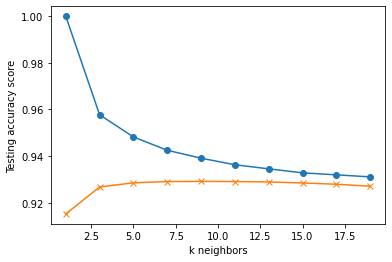

In [14]:
# Graph to show identify optimal K value (7)
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)
print("k=7 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=7 Test Acc: 0.929


In [16]:
# Show the confussion matrix for the KNN model
from sklearn.metrics import confusion_matrix

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[17673   580]
 [ 1716 12403]]


In [17]:
# Print classification report for the KNN model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.97      0.94     18253
              satisfied       0.96      0.88      0.92     14119

               accuracy                           0.93     32372
              macro avg       0.93      0.92      0.93     32372
           weighted avg       0.93      0.93      0.93     32372



# 